In [428]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import roc_auc_score,roc_curve
import joblib
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [429]:
df=pd.read_csv('customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data frame description:

# Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

In [488]:
print('Number of Rows and Columns are : ',df.shape)

Number of Rows and Columns are :  (7043, 15)


In [431]:
# checking the dtypes of the column
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# AS we can see almost all the data is of object type data
# total charges contains float value but it is in object type

In [432]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [433]:
df.loc[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


# As we can see that there is space present in total charges column because of which the data is in object type.

# we will first convert total charges into float and then replace it with mean

In [434]:
#replace space with nan
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)

In [435]:
df['TotalCharges'].isnull().sum()

11

In [436]:
#converting the object type into float
df['TotalCharges']=df['TotalCharges'].astype(float)

In [437]:
df['TotalCharges'].dtypes

dtype('float64')

In [438]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [439]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# we have converted total charges into float and replaced the space with mean

In [440]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [441]:
u=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]

In [442]:
u.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# EDA AND VISUALIZATION

In [443]:
for i in df.columns:
    if df[i].dtypes=='object':
        print(df[i].value_counts())
        print('\n')

6874-SGLHU    1
8608-OZTLB    1
9929-PLVPA    1
8486-AYEQH    1
0274-JKUJR    1
             ..
9402-ROUMJ    1
9730-DRTMJ    1
3509-GWQGF    1
9572-MTILT    1
2982-IHMFT    1
Name: customerID, Length: 7043, dtype: int64


Male      3555
Female    3488
Name: gender, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


No                     3095
Yes                    2422
No internet service    1526
Name: DevicePro

THE ANALYSIS OF gender are : 
Male      3555
Female    3488
Name: gender, dtype: int64


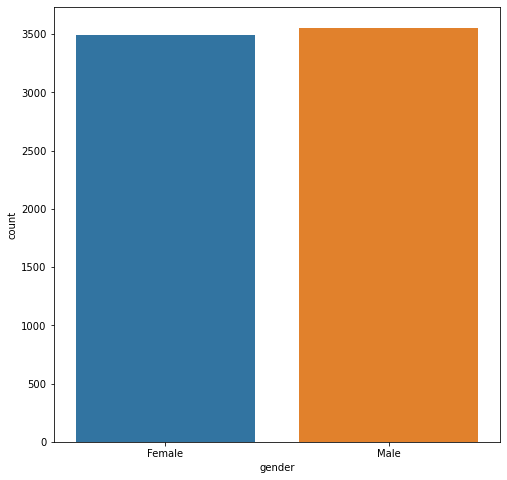



THE ANALYSIS OF Partner are : 
No     3641
Yes    3402
Name: Partner, dtype: int64


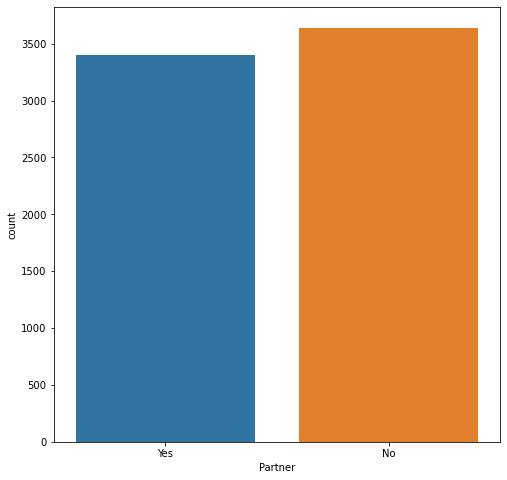



THE ANALYSIS OF Dependents are : 
No     4933
Yes    2110
Name: Dependents, dtype: int64


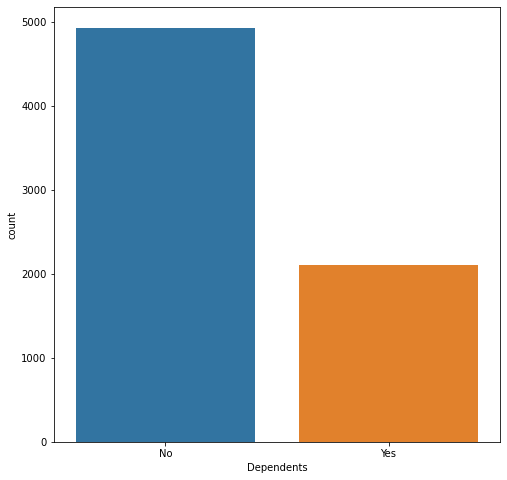



THE ANALYSIS OF PhoneService are : 
Yes    6361
No      682
Name: PhoneService, dtype: int64


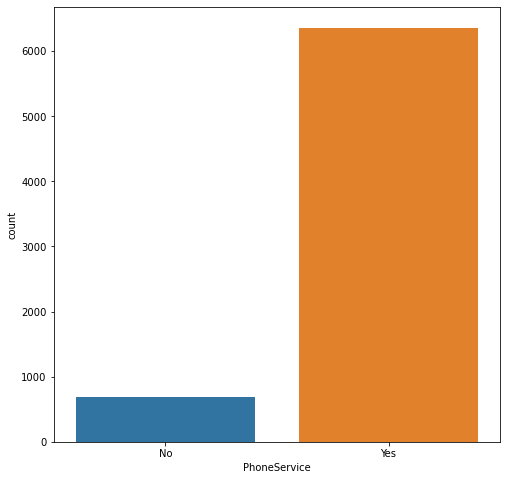



THE ANALYSIS OF MultipleLines are : 
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


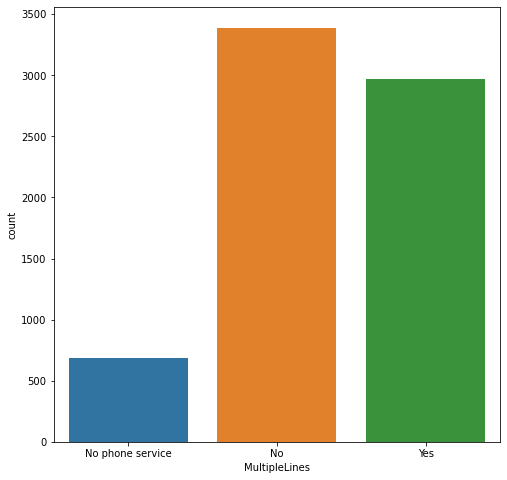



THE ANALYSIS OF InternetService are : 
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


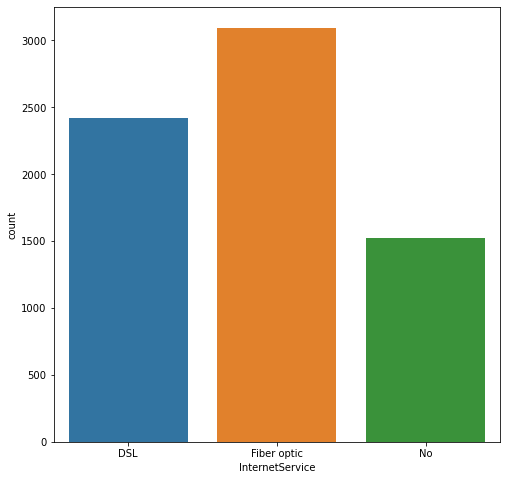



THE ANALYSIS OF OnlineSecurity are : 
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


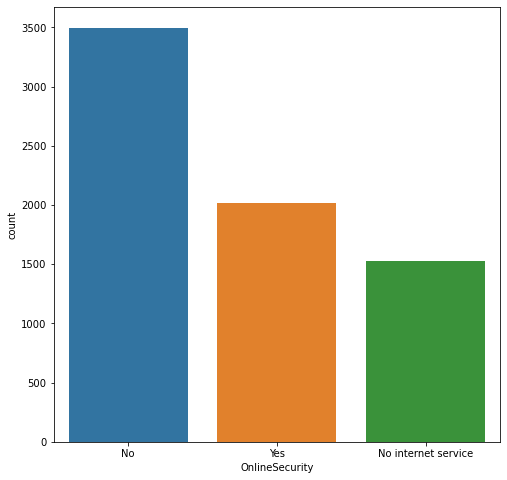



THE ANALYSIS OF OnlineBackup are : 
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


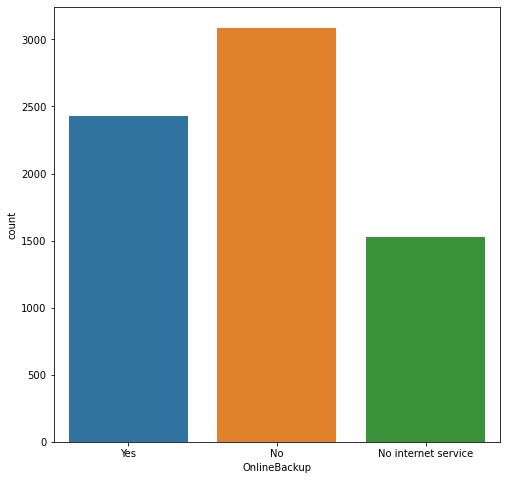



THE ANALYSIS OF DeviceProtection are : 
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


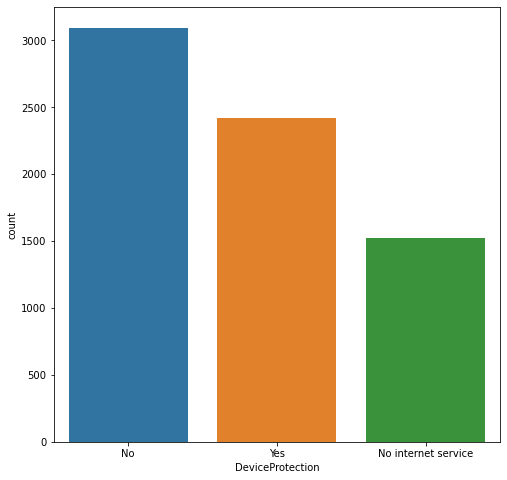



THE ANALYSIS OF TechSupport are : 
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


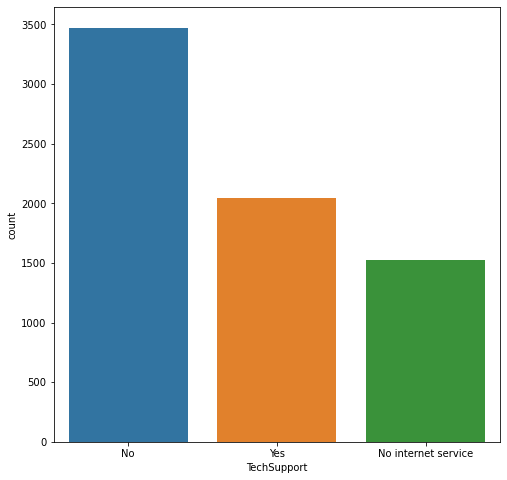



THE ANALYSIS OF StreamingTV are : 
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


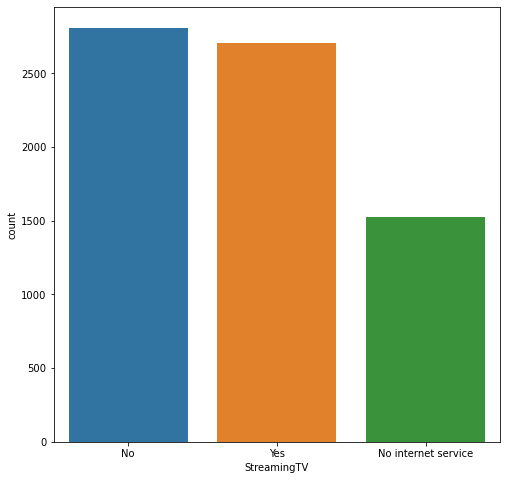



THE ANALYSIS OF StreamingMovies are : 
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


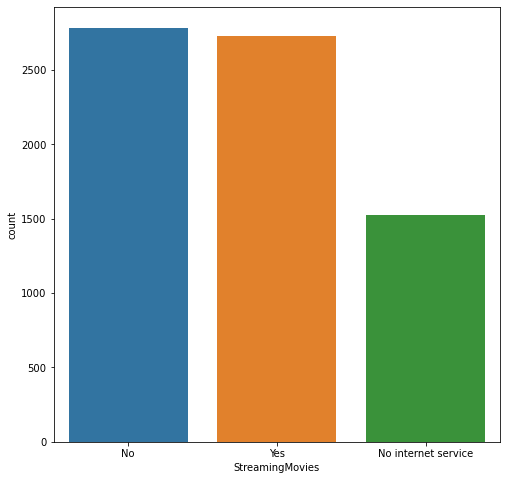



THE ANALYSIS OF Contract are : 
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


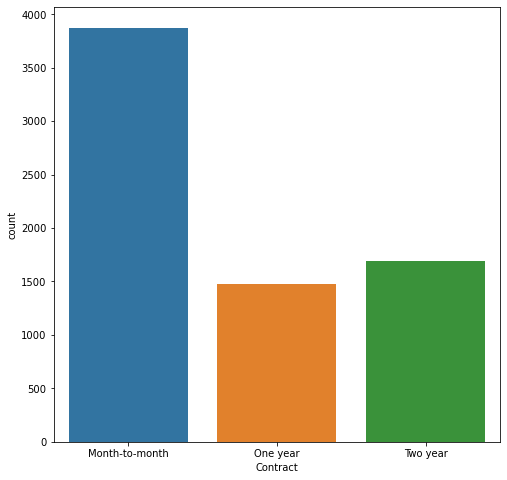



THE ANALYSIS OF PaperlessBilling are : 
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


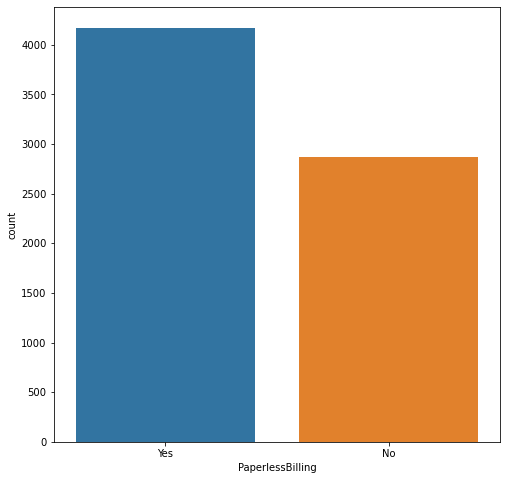



THE ANALYSIS OF PaymentMethod are : 
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


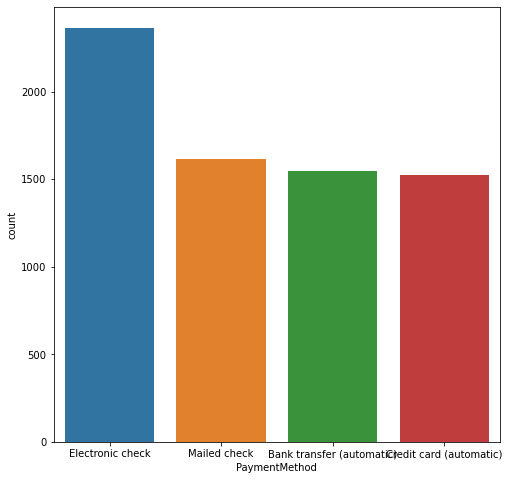



THE ANALYSIS OF Churn are : 
No     5174
Yes    1869
Name: Churn, dtype: int64


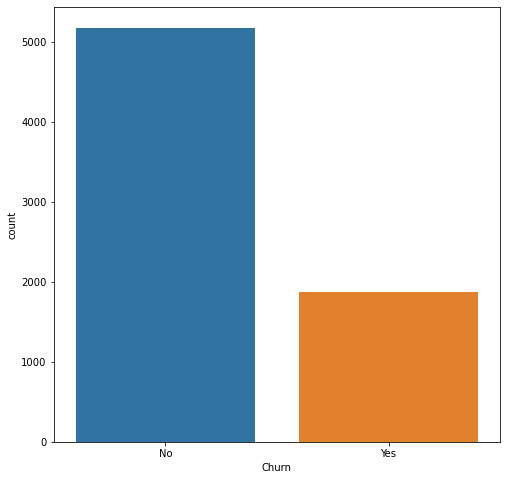

In [444]:
#to plot coutplot along with the value counts of that particular columns
for i in u.columns:
    if u[i].dtypes=='object':
        print('THE ANALYSIS OF',i,'are : ')
        print(df[i].value_counts())
        plt.figure(figsize=(8,8))
        sns.countplot(u[i])
        plt.show()
        print('\n')

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

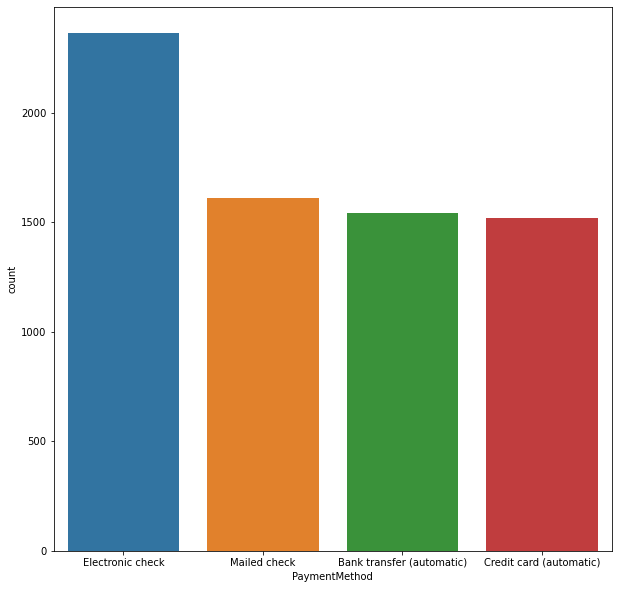

In [445]:
plt.figure(figsize=(10,10))
sns.countplot(df.PaymentMethod)

# what we can check that most of the customers prefer electronic check payment method 

<AxesSubplot:xlabel='Contract', ylabel='count'>

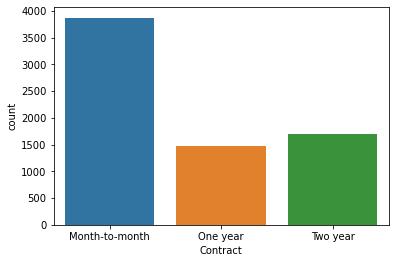

In [446]:
sns.countplot(df.Contract)

# monthly contract is what cutomers prefer compared to year or two year

No     4933
Yes    2110
Name: Dependents, dtype: int64


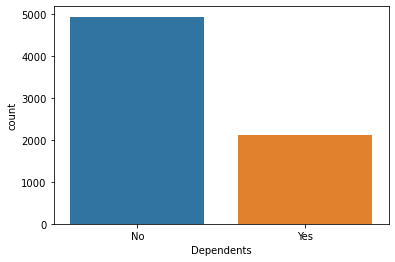

In [447]:
sns.countplot(df.Dependents)
print(df.Dependents.value_counts())

# cutomer with no  dependents are 4933 which is higher compared to cutomer with dependents

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

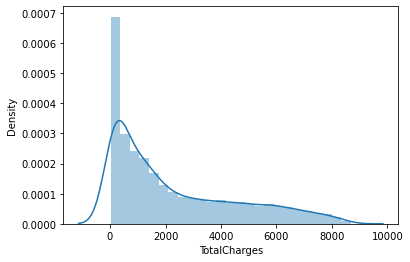

In [448]:
sns.distplot(df['TotalCharges'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

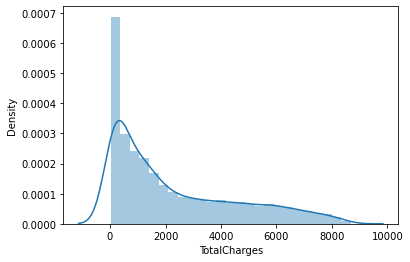

In [449]:
sns.distplot(df['TotalCharges'])

# we will convert the Data into numerical

# Encoding of DataFrame

In [450]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [451]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [452]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


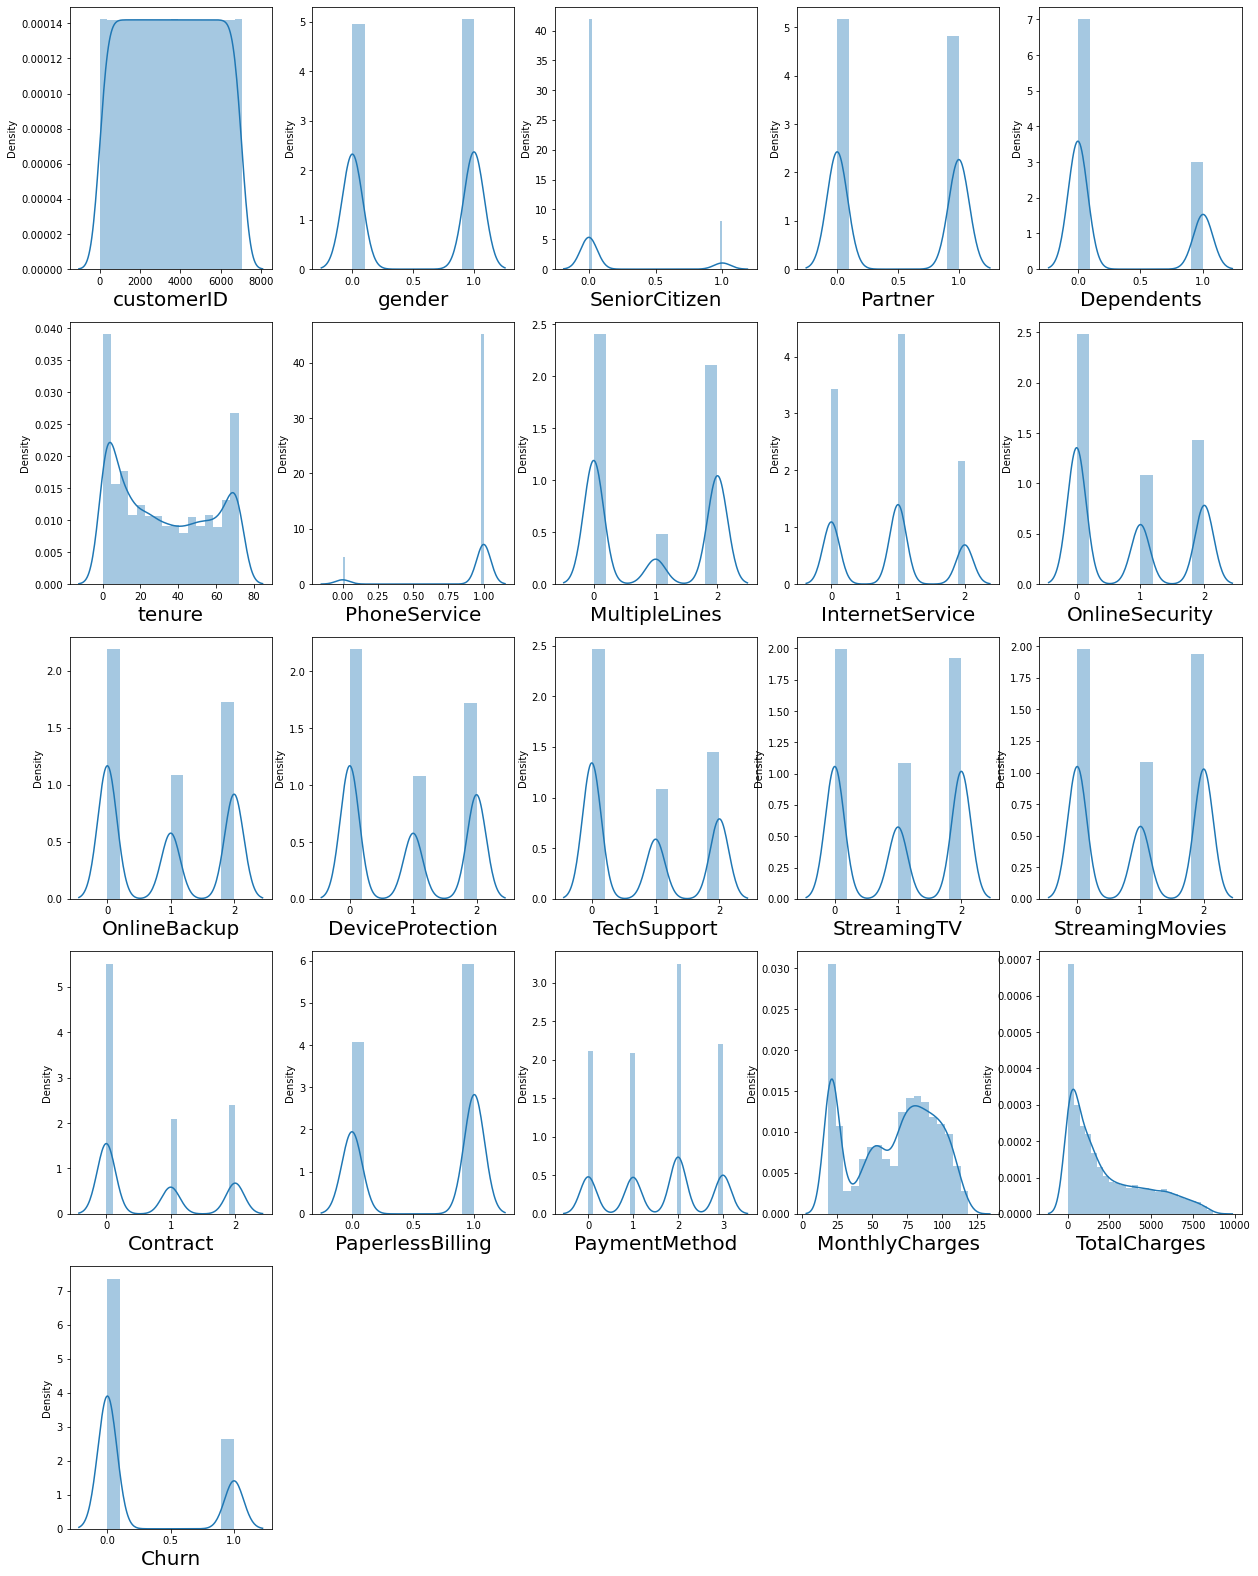

In [453]:
plt.figure(figsize=(21,28))
plotnumber=1
for column in df.columns:
    if plotnumber<=len(df.columns):
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# we can definitely see some skewness present

# Describe the Dataset

In [454]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


<AxesSubplot:>

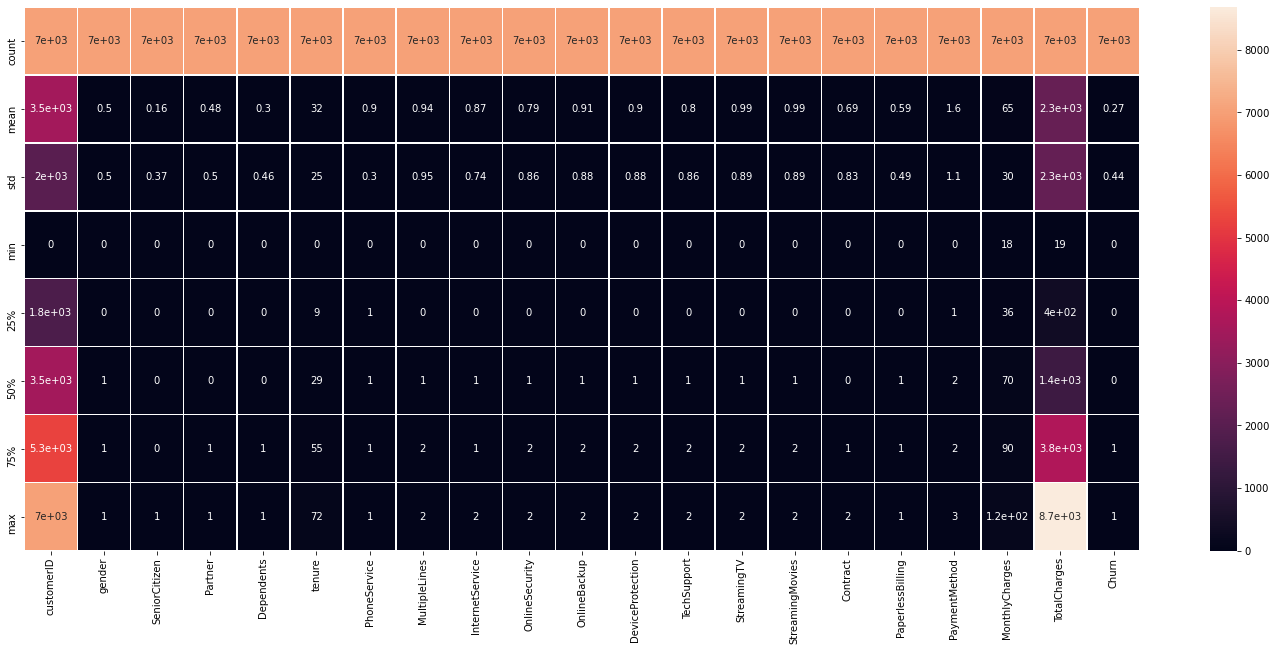

In [455]:
plt.figure(figsize=(25,10))
sns.heatmap(df.describe(),annot=True,linewidth=0.5)

In [456]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.000270,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309


<AxesSubplot:>

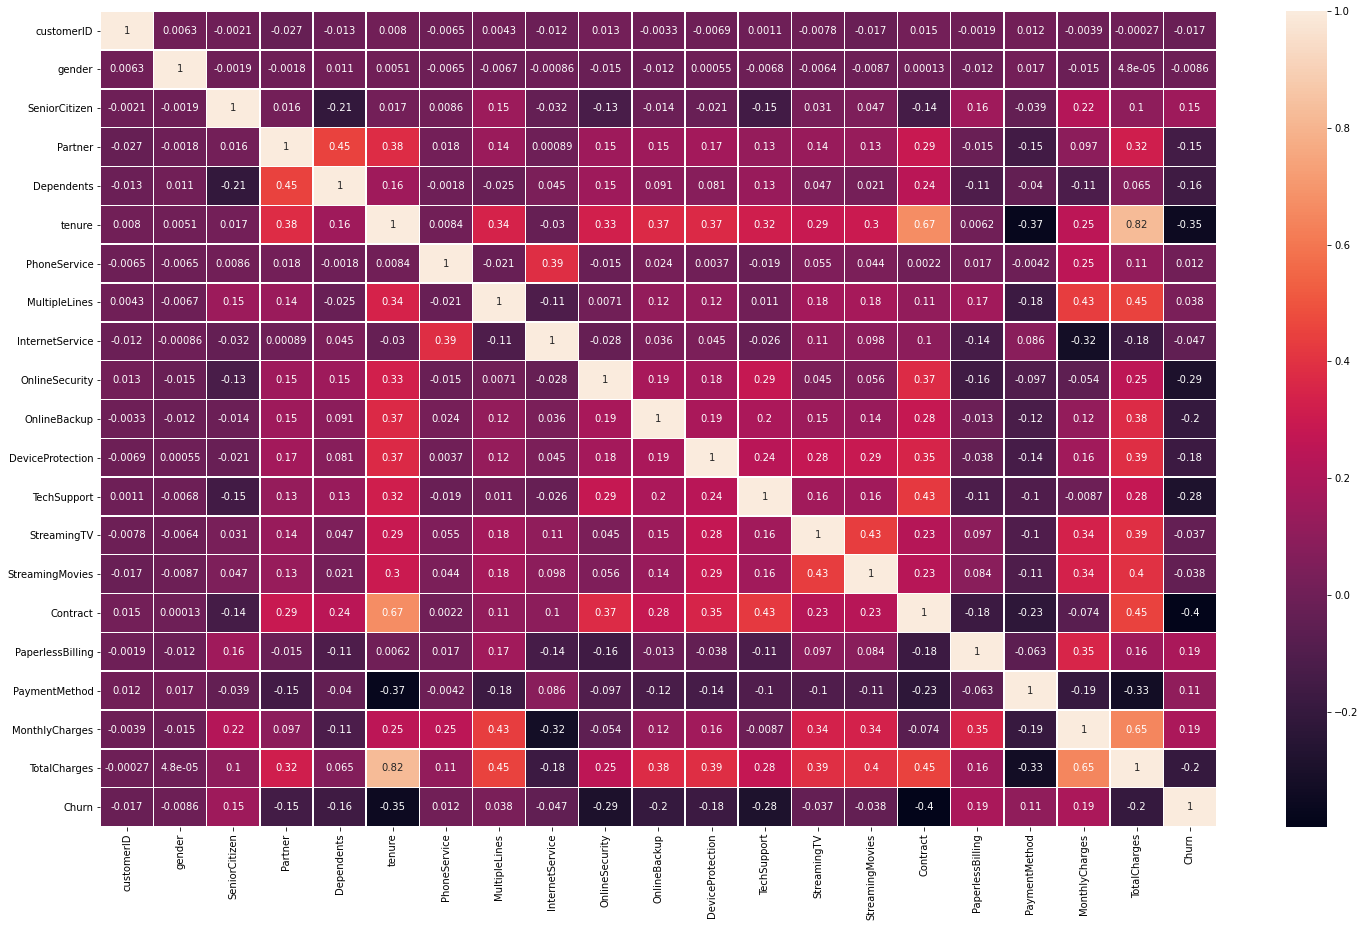

In [457]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,linewidth=0.5)

# from the above we can see that columns like gender ,customer ID,phoneservices, Streamingtv,streaming movies and multiple lines have very less correlation with the target columns hence we can drop the column

In [458]:
#dropping of least correlated columns with the target variable
df=df.drop(['MultipleLines','PhoneService','gender','customerID','StreamingTV','StreamingMovies'],axis=1)
df

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1.0,0.0,1,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,0,0.0,0.0,34,0.0,2.0,0.0,2.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,0,0.0,0.0,2,0.0,2.0,2.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,0,0.0,0.0,45,0.0,2.0,0.0,2.0,2.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1.0,1.0,24,0.0,2.0,0.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,0,1.0,1.0,72,1.0,0.0,2.0,2.0,0.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,0,1.0,1.0,11,0.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,1,1.0,0.0,4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


# checking for outliers

SeniorCitizen          AxesSubplot(0.125,0.772143;0.110714x0.107857)
Partner             AxesSubplot(0.257857,0.772143;0.110714x0.107857)
Dependents          AxesSubplot(0.390714,0.772143;0.110714x0.107857)
tenure              AxesSubplot(0.523571,0.772143;0.110714x0.107857)
InternetService     AxesSubplot(0.656429,0.772143;0.110714x0.107857)
OnlineSecurity      AxesSubplot(0.789286,0.772143;0.110714x0.107857)
OnlineBackup           AxesSubplot(0.125,0.642714;0.110714x0.107857)
DeviceProtection    AxesSubplot(0.257857,0.642714;0.110714x0.107857)
TechSupport         AxesSubplot(0.390714,0.642714;0.110714x0.107857)
Contract            AxesSubplot(0.523571,0.642714;0.110714x0.107857)
PaperlessBilling    AxesSubplot(0.656429,0.642714;0.110714x0.107857)
PaymentMethod       AxesSubplot(0.789286,0.642714;0.110714x0.107857)
MonthlyCharges         AxesSubplot(0.125,0.513286;0.110714x0.107857)
TotalCharges        AxesSubplot(0.257857,0.513286;0.110714x0.107857)
Churn               AxesSubplot(0.

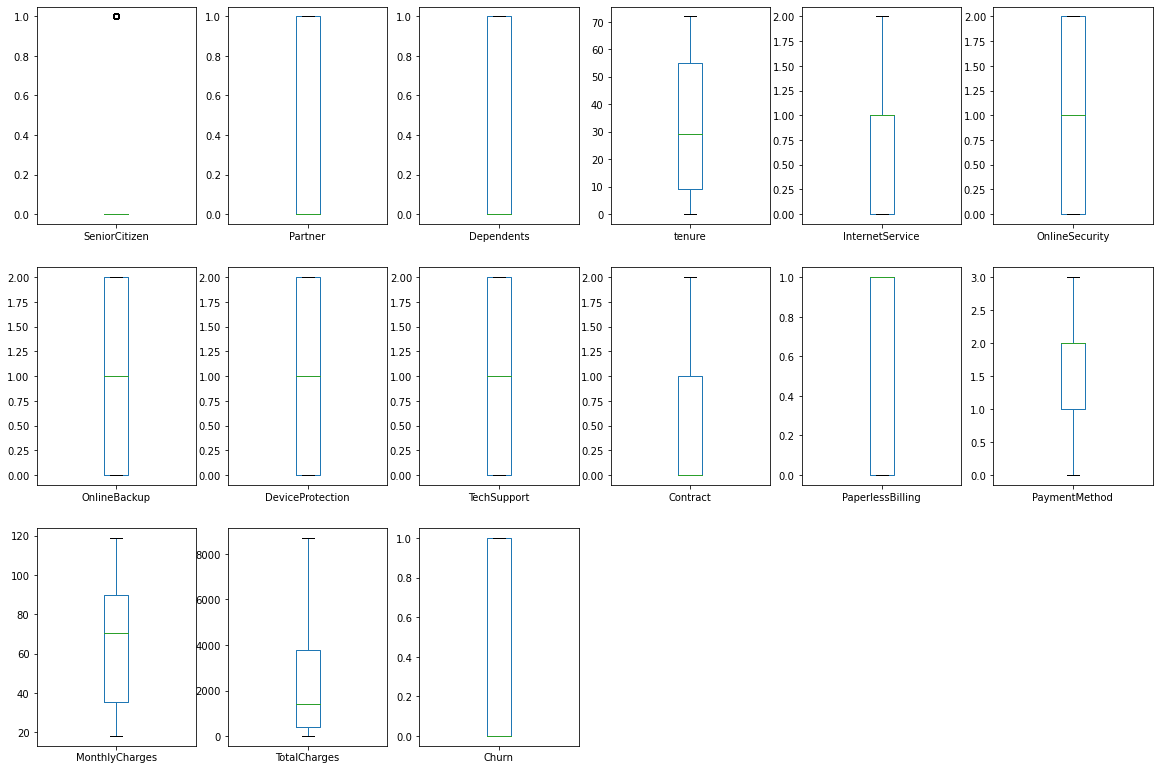

In [459]:
df.plot(kind='box',subplots=True,layout=(6,6),figsize=(20,28))

In [460]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


# no outliers present in the data escept for SeniorCitizen which is categorical column so no need to remove the outliers we can move foward to remove skewness if present

In [461]:
x=df.drop(['Churn'],axis=1)
y=df['Churn']

In [462]:
x.skew()

SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
dtype: float64

# removing the skewness from total charges column, rest all columns with skewness are categorical 

In [463]:
#remove skewness using power_transform
from sklearn.preprocessing import power_transform
x['TotalCharges']=power_transform(x['TotalCharges'].values.reshape(-1,1),method='yeo-johnson')

In [464]:
x.skew()

SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges       -0.144899
dtype: float64

In [465]:
x

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1.0,0.0,1,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,29.85,-1.810588
1,0,0.0,0.0,34,0.0,2.0,0.0,2.0,0.0,1.0,0.0,3.0,56.95,0.253313
2,0,0.0,0.0,2,0.0,2.0,2.0,0.0,0.0,0.0,1.0,3.0,53.85,-1.387269
3,0,0.0,0.0,45,0.0,2.0,0.0,2.0,2.0,1.0,0.0,0.0,42.30,0.232253
4,0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,-1.250118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1.0,1.0,24,0.0,2.0,0.0,2.0,2.0,1.0,1.0,3.0,84.80,0.295688
7039,0,1.0,1.0,72,1.0,0.0,2.0,2.0,0.0,1.0,1.0,1.0,103.20,1.567097
7040,0,1.0,1.0,11,0.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,-0.859899
7041,1,1.0,0.0,4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,-0.922968


In [466]:
x.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

# Feature scaling

In [467]:
#using standard scaler to scale the data
sc=StandardScaler()
x[['MonthlyCharges','TotalCharges']]=sc.fit_transform(x[['MonthlyCharges','TotalCharges']])

# Model Building

In [468]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier() 
svc=SVC()
abc=AdaBoostClassifier()
gb=GradientBoostingClassifier()
rd=RidgeClassifier()
sgdc=SGDClassifier()
etc=ExtraTreesClassifier()

model=[lg,dtc,knn,rfc,svc,abc,gb,rd,sgdc,etc]

In [469]:
#testing the models and checking their accuracy, cross_val_score as well as roc_auc-score
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=45)
for m in model:
    m.fit(xtrain,ytrain)
    m.score(xtrain,ytrain)
    pred=m.predict(xtest)
    print('Accuracy score of ',m,'is :')
    print(accuracy_score(ytest,pred))
    score=cross_val_score(m,x,y,cv=5).mean()    
    print('cross_val score :',score)
    print(confusion_matrix(ytest,pred))
    print(classification_report(ytest,pred))
    print('roc auc score :',roc_auc_score(ytest,pred))
    print('\n')

Accuracy score of  LogisticRegression() is :
0.8147622427253371
cross_val score : 0.8047709731272985
[[955 101]
 [160 193]]
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1056
         1.0       0.66      0.55      0.60       353

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409

roc auc score : 0.7255491351188943


Accuracy score of  DecisionTreeClassifier() is :
0.7444996451383961
cross_val score : 0.7259673003096976
[[848 208]
 [152 201]]
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82      1056
         1.0       0.49      0.57      0.53       353

    accuracy                           0.74      1409
   macro avg       0.67      0.69      0.68      1409
weighted avg       0.76      0.74      0.75      1409

roc auc score : 0.6862177010902223


Accuracy score of  K

# in the above code we checked the models and their accuracy score, roc-auc_score and cross_val_score

# we saw that the Random forest classifier,Gradient boosting classifier and SVC are the best performing models with close to 83% accuracy score and also 80% cross_val_mean score

# we will hypertune these models and will save the best model for this datset

# SVC

In [276]:
# best parameter for SVC
svc=SVC()
parameters={'kernel':('linear', 'poly', 'rbf'),'C':[0.001,0.1,1.0]}
clf=GridSearchCV(svc,parameters)
clf.fit(xtrain,ytrain)
clf.best_params_

{'C': 1.0, 'kernel': 'linear'}

In [279]:
svc=SVC(kernel='rbf',C=1.0)
svc.fit(xtrain,ytrain)
pred=svc.predict(xtest)
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))
print('accuracy_score :',accuracy_score(ytest,pred))

[[973  83]
 [170 183]]
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88      1056
         1.0       0.69      0.52      0.59       353

    accuracy                           0.82      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.81      0.82      0.81      1409

accuracy_score : 0.8204400283889283


In [490]:
svc=SVC(kernel='rbf',C=1.0)
svc.fit(x,y)
pred=svc.predict(x)
print(confusion_matrix(y,pred))
print(classification_report(y,pred))
print('accuracy_score :',accuracy_score(y,pred))

[[5169    5]
 [  44 1825]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      5174
         1.0       1.00      0.98      0.99      1869

    accuracy                           0.99      7043
   macro avg       0.99      0.99      0.99      7043
weighted avg       0.99      0.99      0.99      7043

accuracy_score : 0.9930427374698282


# Gradientboost

In [ ]:
parameters={'n_estimators':[10,100,500],'criterion':['friedman_mse', 'mse', 'mae'],'loss':['deviance','exponential']}
clf=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5,scoring='roc_auc')
clf.fit(x,y)
clf.best_params_

In [471]:
gb=GradientBoostingClassifier(criterion='friedman_mse',loss= 'exponential', n_estimators= 100)
gb.fit(xtrain,ytrain)
gb.score(xtrain,ytrain)
pred=gb.predict(xtest)
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))
print('accuracy_score :',accuracy_score(ytest,pred))

[[956 100]
 [156 197]]
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88      1056
         1.0       0.66      0.56      0.61       353

    accuracy                           0.82      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.81      0.82      0.81      1409

accuracy_score : 0.8183108587650816


# Random forest classifier

In [473]:
rfc=RandomForestClassifier()
parameters={"n_estimators":[10,100,150],"max_features": ["auto", "sqrt", "log2"],'criterion':['gini', 'entropy']}
clf=GridSearchCV(rfc,parameters,cv=5,scoring='roc_auc')
clf.fit(xtrain,ytrain)
clf.best_params_

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 150}

In [474]:
rfc=RandomForestClassifier(n_estimators=150,max_features='log2',criterion='entropy')
rfc.fit(xtrain,ytrain)
pred=rfc.predict(xtest)
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))
print('accuracy_score :',accuracy_score(ytest,pred))

roc_auc score :  0.7165770667010044
[[954 102]
 [166 187]]
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88      1056
         1.0       0.65      0.53      0.58       353

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

accuracy_score : 0.8097941802696949


# testing on the whole dataset

In [479]:
rfc=RandomForestClassifier(n_estimators=150,max_features='auto',criterion='entropy')
rfc.fit(x,y)
pred=rfc.predict(x)
print('roc_auc score : ',roc_auc_score(y,pred))
print(confusion_matrix(y,pred))
print(classification_report(y,pred))
print('accuracy_score :',accuracy_score(y,pred))

roc_auc score :  0.9956524711055794
[[5165    9]
 [  13 1856]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5174
         1.0       1.00      0.99      0.99      1869

    accuracy                           1.00      7043
   macro avg       1.00      1.00      1.00      7043
weighted avg       1.00      1.00      1.00      7043

accuracy_score : 0.9968763311089025


In [ ]:
checking roc_auc curve

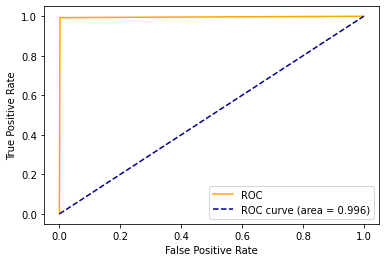

In [482]:
fpr, tpr, threshold = roc_curve(y,pred)
auc = roc_auc_score(y,pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [480]:
x['predicted_churn']=pred
x['Churn']=y
x[['predicted_churn','Churn']]

,predicted_churn,Churn
0,0.0,0.0
1,0.0,0.0
2,1.0,1.0
3,0.0,0.0
4,1.0,1.0
...,...,...
7038,0.0,0.0
7039,0.0,0.0
7040,0.0,0.0
7041,1.0,1.0


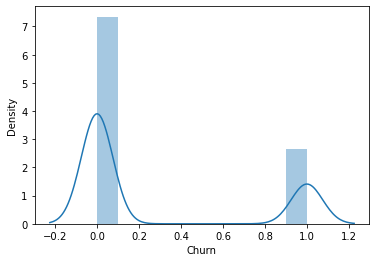

<AxesSubplot:xlabel='predicted_churn', ylabel='Density'>

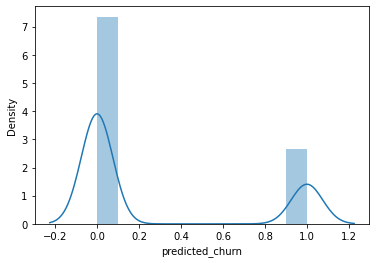

In [484]:
sns.distplot(x['Churn'])
plt.show()
sns.distplot(x['predicted_churn'])

# the results are very similar to each other

# Saving the model

In [486]:
joblib.dump(rfc,'customer_churn.obj')

['customer_churn.obj']